# Hoja de Trabajo 1: Análisis Exploratorio 

In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm

#### Leyendo los datos del archivo "movies"

In [8]:
datos=pd.read_csv("movies.csv", encoding='cp1252')

## PROBLEMA 1: Resumen del conjunto de datos

In [9]:
datos.describe()

,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,249876.829300,1.855163e+07,5.673753e+07,100.268100,51.393907,6.483490,1342.381800,2.596500,3.171400,1.751000,2147.666600
std,257380.109004,3.662669e+07,1.495826e+08,27.777829,216.729552,0.984274,2564.196637,1.154565,2.539738,3.012093,37200.075802
min,5.000000,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12286.500000,0.000000e+00,0.000000e+00,90.000000,14.577750,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000
50%,152558.000000,5.000000e+05,1.631245e+05,100.000000,21.905500,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000
75%,452021.750000,2.000000e+07,4.479661e+07,113.000000,40.654000,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000
max,922260.000000,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000


In [10]:
datos.shape

(10000, 27)

## Problema 4

### 4.1) Las 10 películas con mayor presupuesto

In [11]:
a = datos.nlargest(10,["budget"])

In [12]:
a[["title","budget", "revenue", "voteCount", "voteAvg"]]

,title,budget,revenue,voteCount,voteAvg
716,Pirates of the Caribbean: On Stranger Tides,380000000,1.045714e+09,11580,6.5
4710,Avengers: Age of Ultron,365000000,1.405404e+09,19219,7.3
5952,Avengers: Endgame,356000000,2.797801e+09,20186,8.3
163,Pirates of the Caribbean: At World's End,300000000,9.610000e+08,11650,7.2
4953,Justice League,300000000,6.579243e+08,11081,6.2
5953,Avengers: Infinity War,300000000,2.046240e+09,23715,8.3
607,Superman Returns,270000000,3.910812e+08,3336,5.7
3791,Tangled,260000000,5.924617e+08,9129,7.6
7134,The Lion King,260000000,1.667635e+09,8203,7.1
280,Spider-Man 3,258000000,8.908716e+08,11137,6.3


### 4.2) Las 10 películas con mayores ingresos

In [13]:
b = datos.nlargest(10,["revenue"])

In [14]:
b[["title","revenue","budget", "voteCount", "voteAvg"]]

,title,revenue,budget,voteCount,voteAvg
3210,Avatar,2.847246e+09,237000000,24766,7.5
5952,Avengers: Endgame,2.797801e+09,356000000,20186,8.3
307,Titanic,2.187464e+09,200000000,20447,7.9
4947,Star Wars: The Force Awakens,2.068224e+09,245000000,16616,7.3
5953,Avengers: Infinity War,2.046240e+09,300000000,23715,8.3
4914,Jurassic World,1.671713e+09,150000000,17604,6.7
7134,The Lion King,1.667635e+09,260000000,8203,7.1
9049,Spider-Man: No Way Home,1.631853e+09,200000000,5630,8.5
3397,The Avengers,1.518816e+09,220000000,26215,7.7
5087,Furious 7,1.515048e+09,190000000,8903,7.3


### 4.3) Película que más votos tuvo

In [15]:
c = datos.nlargest(1,["voteCount"])

In [16]:
c[["title","voteCount","voteAvg", "revenue", "budget"]]

,title,voteCount,voteAvg,revenue,budget
3511,Inception,30788,8.4,825532764.0,160000000


### 4.4) Peor Película de acurdo a los votos de todos los usuarios

In [17]:
d = datos.nsmallest(1,["voteAvg"])

In [18]:
d[["title","voteCount","voteAvg", "revenue", "budget"]]

,title,voteCount,voteAvg,revenue,budget
9786,DAKAICHI -I'm Being Harassed by the Sexiest Ma...,2,1.3,0.0,0


In [19]:
datos4 = datos[datos["voteCount"] > 1316]

In [20]:
datos4_peor = datos4.nsmallest(1,["voteAvg"])

In [21]:
datos4_peor[["title","voteCount","voteAvg", "revenue", "budget"]]

,title,voteCount,voteAvg,revenue,budget
2766,Dragonball Evolution,1600,2.8,58228460.0,30000000


### 4.5) ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas? Haga un gráfico de barras

In [22]:
años = datos['releaseDate'].str.split('/', expand = True) # Separando la fecha para obtener el año

In [23]:
resumen_fecha = años[2].value_counts().to_frame()

In [32]:
resumen_fecha.columns = ['No.Peliculas']

In [33]:
resumen_fecha

,No.Peliculas
2021,816
2018,629
2017,618
2019,612
2016,557
...,...
1936,1
1929,1
1926,1
1902,1


<AxesSubplot:>

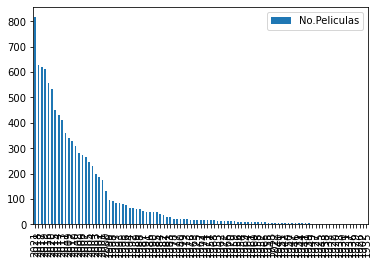

In [34]:
resumen_fecha.plot(kind='bar')

In [38]:
top20 = resumen_fecha.nlargest(20,["No.Peliculas"]) # Se analizará los 10 años donde se realizaron más películas

In [40]:
top20

,No.Peliculas
2021,816
2018,629
2017,618
2019,612
2016,557
2020,533
2015,450
2014,432
2013,412
2011,361


<AxesSubplot:>

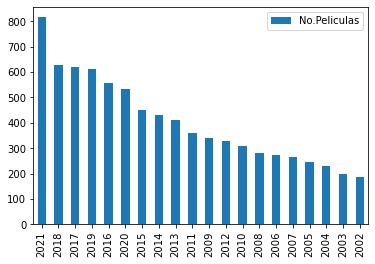

In [41]:
top20.plot(kind='bar')